In [1]:
import os
import re
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

In [62]:
def plot_potential_energy(md_platform, state_file_list, plot_type, window, title):
    energy_arrays = []
    labels = []
    for i, state_file in enumerate(state_file_list):
        if md_platform == 'openmm':
            df = pd.read_csv(state_file)
        elif md_platform == 'gromacs':
            csv_file = os.path.splitext(state_file)[0] + '.csv'
            with open(state_file, 'r') as fin, open(csv_file, 'w') as fout:
                for line in fin:
                    if not (line.startswith('@') or line.startswith('#')):
                        fout.write(','.join(line.split()) + '\n')
            #df = pd.read_csv(csv_file, header=None) #ignore the first row as initial state
            df = pd.read_csv(csv_file)
            df.columns = ['time', 'Potential Energy (kJ/mole)']
        energy = df['Potential Energy (kJ/mole)'].to_numpy()
        n_windows = len(energy) // window
        avg_energy = np.array([energy[i*window:(i+1)*window].mean() for i in range(n_windows)])
        avg_frames = np.arange(n_windows) * window
        energy_arrays.append(avg_energy)
        #labels.append(f'replicate {i+1}')
        labels = ['300K NPT', '400K NPT', '500K NPT']
        if plot_type == 'line':
            #plt.plot(avg_frames, avg_energy, label=labels[-1])
            plt.plot(avg_frames, avg_energy, label=labels[i])
            plt.xlabel('Frames')
            plt.ylabel('Potential Energy (kJ/mole)')
            plt.title(f'Potential Energy Over Time (Window = {window} frames)')
            #plt.ylim(np.mean(energy) - 5*np.std(energy), np.mean(energy) + 5*np.std(energy))
            print(f'{labels[i]}: Mean = {np.mean(avg_energy):.2f}, Std = {np.std(avg_energy):.2f}')
        elif plot_type == 'hist':
            #sns.kdeplot(avg_energy, label=labels[-1])
            sns.kdeplot(avg_energy, label=labels[i])
            plt.xlabel('Potential Energy (kJ/mole)')
            plt.title(title)
            #plt.xlim(np.mean(energy) - 5*np.std(energy), np.mean(energy) + 5*np.std(energy))
            print(f'{labels[i]}: Mean = {np.mean(avg_energy):.2f}, Std = {np.std(avg_energy):.2f}')
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.close()
    #return energy_arrays

In [63]:
def plot_total_energy(md_platform, state_file_list, plot_type, window, title):
    energy_arrays = []
    labels = []
    for i, state_file in enumerate(state_file_list):
        if md_platform == 'openmm':
            df = pd.read_csv(state_file)
        elif md_platform == 'gromacs':
            csv_file = os.path.splitext(state_file)[0] + '.csv'
            with open(state_file, 'r') as fin, open(csv_file, 'w') as fout:
                for line in fin:
                    if not (line.startswith('@') or line.startswith('#')):
                        fout.write(','.join(line.split()) + '\n')
            #df = pd.read_csv(csv_file, header=None) #ignore the first row as initial state
            df = pd.read_csv(csv_file)
            df.columns = ['time', 'Total Energy (kJ/mole)']
        energy = df['Total Energy (kJ/mole)'].to_numpy()
        n_windows = len(energy) // window
        avg_energy = np.array([energy[i*window:(i+1)*window].mean() for i in range(n_windows)])
        avg_frames = np.arange(n_windows) * window
        energy_arrays.append(avg_energy)
        #labels.append(f'replicate {i+1}')
        labels = ['300K NPT', '400K NPT', '500K NPT']
        if plot_type == 'line':
            plt.plot(avg_frames, avg_energy, label=labels[i])
            plt.xlabel('Frames')
            plt.ylabel('Total Energy (kJ/mole)')
            plt.title(f'Total Energy Over Time (Window = {window} frames)')
            #plt.ylim(np.mean(energy) - 5*np.std(energy), np.mean(energy) + 5*np.std(energy))
            print(f'{labels[i]}: Mean = {np.mean(avg_energy):.2f}, Std = {np.std(avg_energy):.2f}')
        elif plot_type == 'hist':
            sns.kdeplot(avg_energy, label=labels[i])
            plt.xlabel('Total Energy (kJ/mole)')
            plt.title(title)
            #plt.xlim(np.mean(energy) - 5*np.std(energy), np.mean(energy) + 5*np.std(energy))
            print(f'{labels[i]}: Mean = {np.mean(avg_energy):.2f}, Std = {np.std(avg_energy):.2f}')
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.close()
    #return energy_arrays

In [ ]:
plot_potential_energy('openmm', ['classic/classic_gaff/energy_data.csv'], 'line', 1)
plot_potential_energy('openmm', ['classic/classic_sage/energy_data.csv'], 'line', 1)
plot_potential_energy('openmm', ['classic/classic_ANI2x/data.csv'], 'line', 1)
plot_potential_energy('openmm', ['classic/classic_MACEsmall/data.csv'], 'line', 1)

300K NPT: Mean = -8825073.61, Std = 619.26
400K NPT: Mean = -8816721.99, Std = 1019.40
500K NPT: Mean = -8809105.30, Std = 1347.00


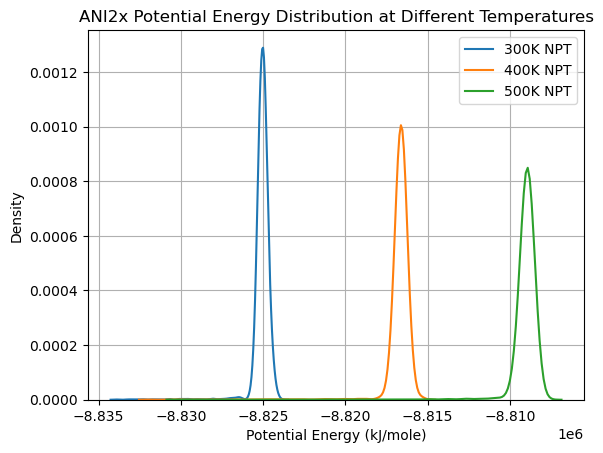

In [65]:
plot_potential_energy('openmm', ['classic/classic_ANI2x_longtime/data.csv',
                                 'classic/classic_ANI2x_longtime_400K/data.csv',
                                 'classic/classic_ANI2x_longtime_500K/data.csv'
                                 ], 'hist', 1, 'ANI2x Potential Energy Distribution at Different Temperatures')

300K NPT: Mean = -8812343.96, Std = 948.52
400K NPT: Mean = -8799710.89, Std = 1524.83
500K NPT: Mean = -8787898.74, Std = 2018.52


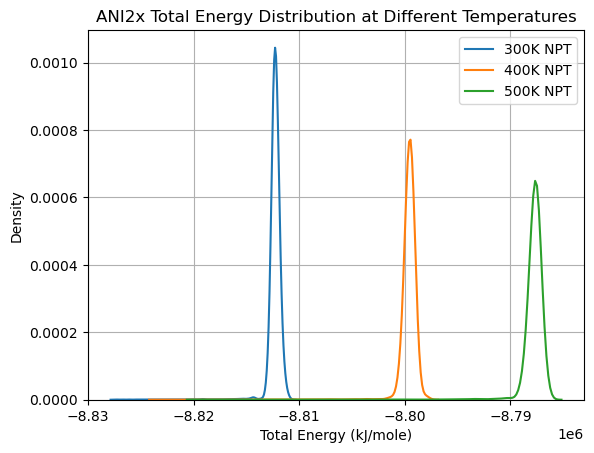

In [66]:
plot_total_energy('openmm', ['classic/classic_ANI2x_longtime/data.csv',
                                 'classic/classic_ANI2x_longtime_400K/data.csv',
                                 'classic/classic_ANI2x_longtime_500K/data.csv'
                                 ], 'hist', 1, 'ANI2x Total Energy Distribution at Different Temperatures')

300K NPT: Mean = -64616.57, Std = 258.92
400K NPT: Mean = -56270.93, Std = 338.42
500K NPT: Mean = -48435.36, Std = 408.60


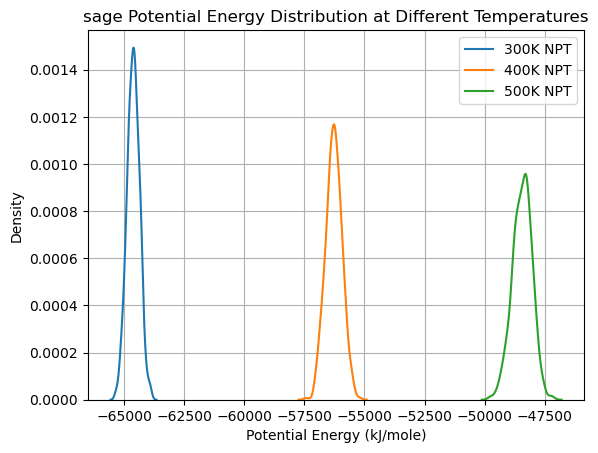

In [68]:
plot_potential_energy('openmm', ['classic/classic_sage/energy_data.csv',
                                 'classic/classic_sage_400K/energy_data.csv',
                                 'classic/classic_sage_500K/energy_data.csv'
                                 ], 'hist', 1, 'sage Potential Energy Distribution at Different Temperatures')

300K NPT: Mean = -51925.64, Std = 320.82
400K NPT: Mean = -39350.73, Std = 419.61
500K NPT: Mean = -27297.93, Std = 504.06


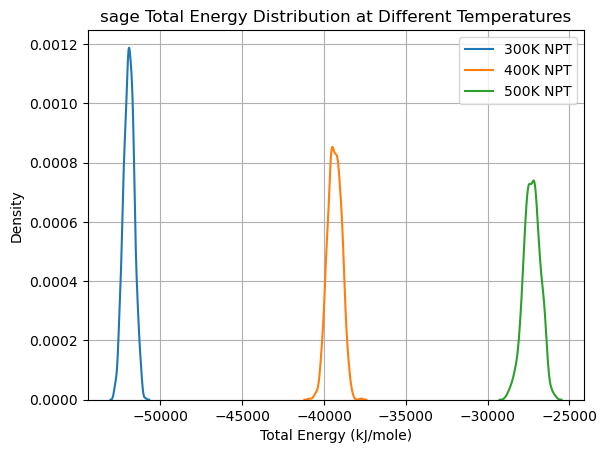

In [69]:
plot_total_energy('openmm', ['classic/classic_sage/energy_data.csv',
                                 'classic/classic_sage_400K/energy_data.csv',
                                 'classic/classic_sage_500K/energy_data.csv'
                                 ], 'hist', 1, 'sage Total Energy Distribution at Different Temperatures')

In [7]:
def plot_rmsd_fluctuations_multiple(traj_files, top_file, plot_type, window, saved_file_paths):
    rmsd_arrays = []
    labels = []
    for i, traj_file in enumerate(traj_files):
        traj = md.load(traj_file, top=top_file)
        try:
            traj.image_molecules(inplace=True)
        except:
            pass
        frames = np.arange(0, traj.n_frames)
        ligand_atoms = traj.topology.select('resname UNK')
        traj.superpose(traj, frame=0, atom_indices=ligand_atoms)
        traj.save(saved_file_paths[i])
        result = traj.xyz[:, ligand_atoms, :] - traj.xyz[0, ligand_atoms, :]
        ligand_rmsd = np.sqrt((result ** 2).sum(axis=-1).mean(axis=-1))
        n_windows = len(ligand_rmsd) // window
        avg_rmsd = np.array([ligand_rmsd[i*window:(i+1)*window].mean() for i in range(n_windows)])
        avg_frames = np.arange(n_windows) * window
        rmsd_arrays.append(avg_rmsd)
        labels.append(f'replicate {i+1}')
        if plot_type == 'line':
            plt.plot(avg_frames, avg_rmsd, label=labels[-1])
            plt.xlabel('Frames')
            plt.ylabel('RMSD (nm)')
            plt.title(f'Ligand RMSD')
        elif plot_type == 'hist':
            sns.kdeplot(avg_rmsd, label=labels[-1])
            plt.xlabel('RMSD (nm)')
            plt.title('Ligand RMSD Distribution')
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.close()
    return traj

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


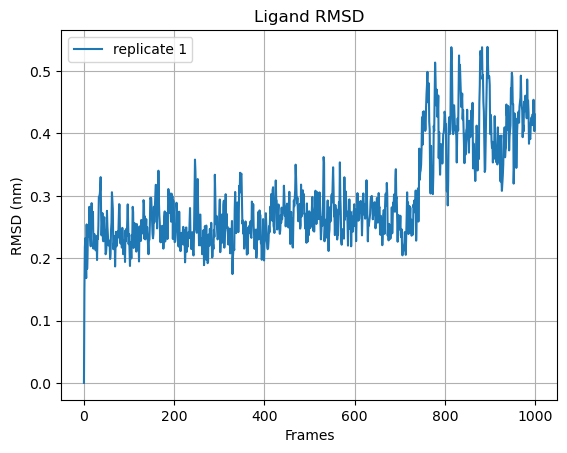

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


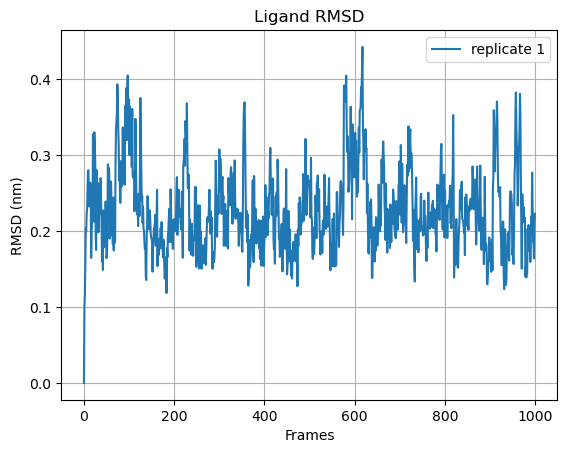

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


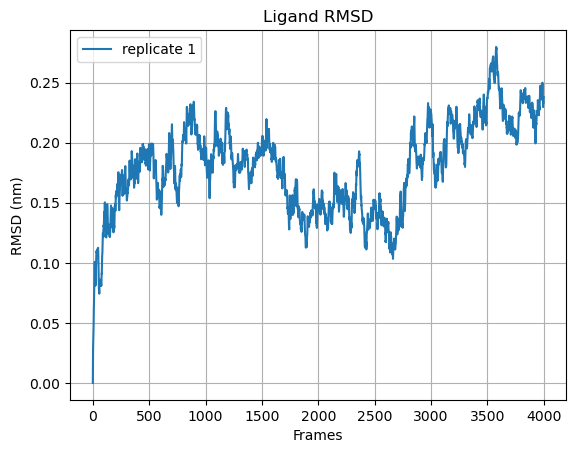

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


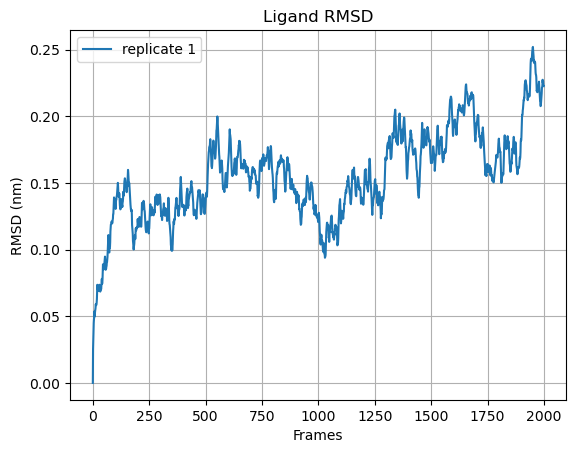

In [8]:
trj_gaff = plot_rmsd_fluctuations_multiple(['classic/classic_gaff/trajectory.dcd'], 'classic/classic_gaff/gaff_ligand_in_solvent.pdb', 'line', 1, ['classic/classic_gaff/processed.xtc'])
trj_sage = plot_rmsd_fluctuations_multiple(['classic/classic_sage/trajectory.dcd'], 'classic/classic_sage/ligand_in_solvent.pdb', 'line', 1, ['classic/classic_sage/processed.xtc'])
#trj_ani  = plot_rmsd_fluctuations_multiple(['classic/classic_ANI2x/test_ani_mixed.dcd'], 'classic/classic_ANI2x/gaff_ligand_in_solvent.pdb', 'line', 1, ['classic/classic_ANI2x/processed.xtc'])
trj_ani_longtime  = plot_rmsd_fluctuations_multiple(['classic/classic_ANI2x_longtime/test_ani_mixed.dcd'], 'classic/classic_ANI2x_longtime/gaff_ligand_in_solvent.pdb', 'line', 1, ['classic/classic_ANI2x_longtime/processed.xtc'])
trj_mace = plot_rmsd_fluctuations_multiple(['classic/classic_MACEsmall/test_mace_mixed.dcd'], 'classic/classic_MACEsmall/gaff_ligand_in_solvent.pdb', 'line', 1, ['classic/classic_MACEsmall/processed.xtc'])

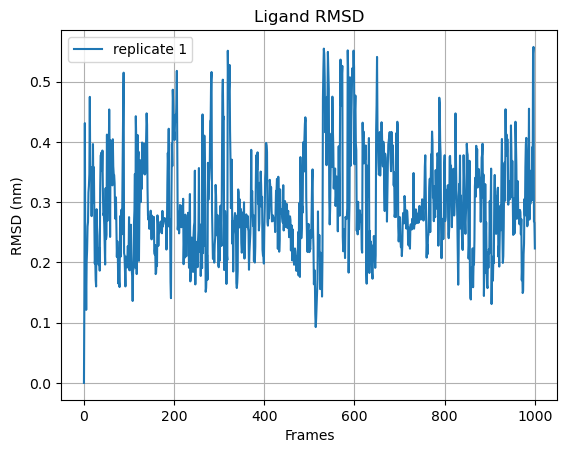

In [9]:
trj_sage_remd = plot_rmsd_fluctuations_multiple(['REMD/REMD_2/replicate_0/md_pbc_fit.xtc'], 'REMD/REMD_2/ligand_in_solvent.pdb', 'line', 1, ['REMD/REMD_2/0_processed.xtc'])

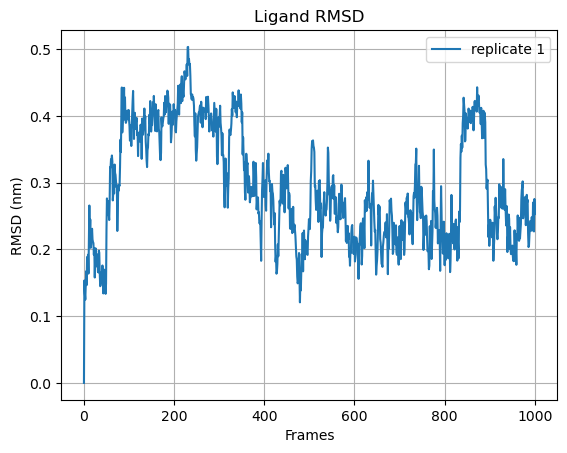

In [10]:
trj_sage_rest = plot_rmsd_fluctuations_multiple(['REST/REST_4/replica_0_ligand_samples.pdb'], 'REST/ligand.pdb', 'line', 1, ['REST/REST_4/0_processed.xtc'])

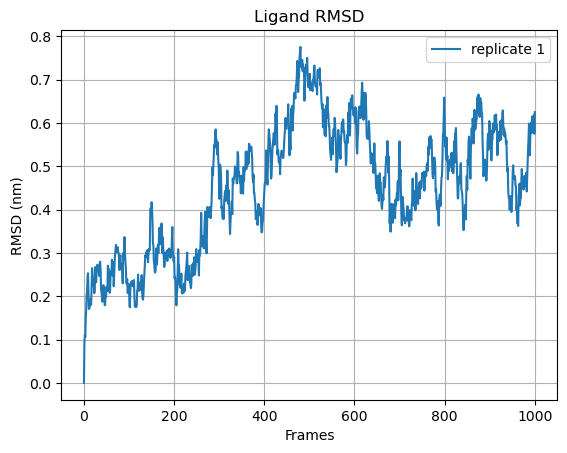

In [11]:
trj_sage_antrop_rest = plot_rmsd_fluctuations_multiple(['REST/antropisomer/replica_0_ligand_samples.pdb'], 'REST/ligand_antropisomer.pdb', 'line', 1, ['REST/antropisomer/0_processed.xtc'])

In [12]:
def plot_dihedral_angles(traj_cont, atom_indices):
    dihedral_angles = md.compute_dihedrals(traj_cont, [atom_indices])
    dihedral_angles_deg = np.degrees(dihedral_angles[:, 0])
    plt.figure(figsize=(8, 6))
    sns.kdeplot(dihedral_angles_deg)
    plt.xlabel('Dihedral Angle (degrees)')
    plt.ylabel('Density')
    plt.title('Dihedral Angle Distribution')
    plt.xlim(-180, 180)
    plt.grid(True)
    plt.show()
    plt.close()
    return np.mean(dihedral_angles_deg)

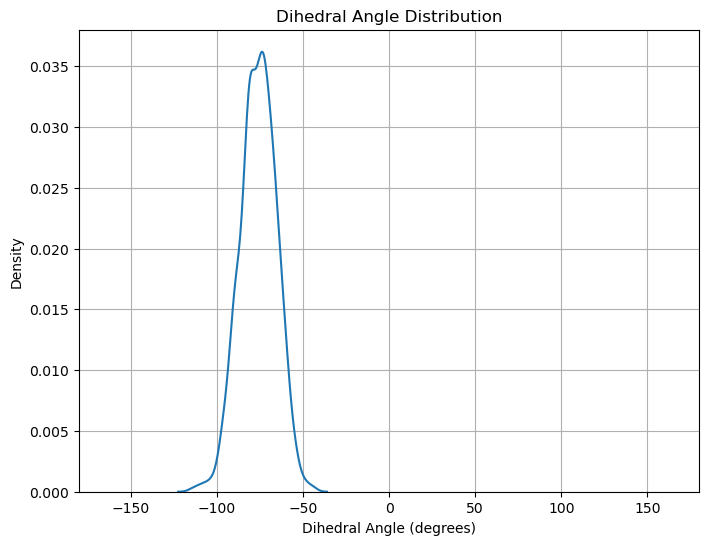

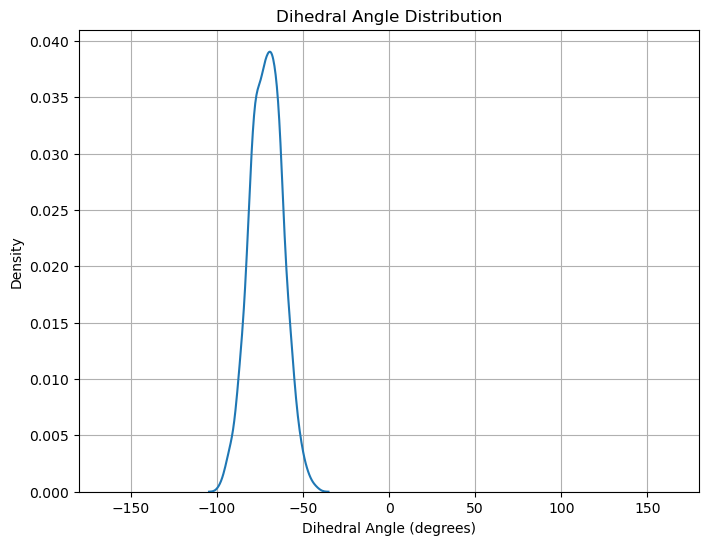

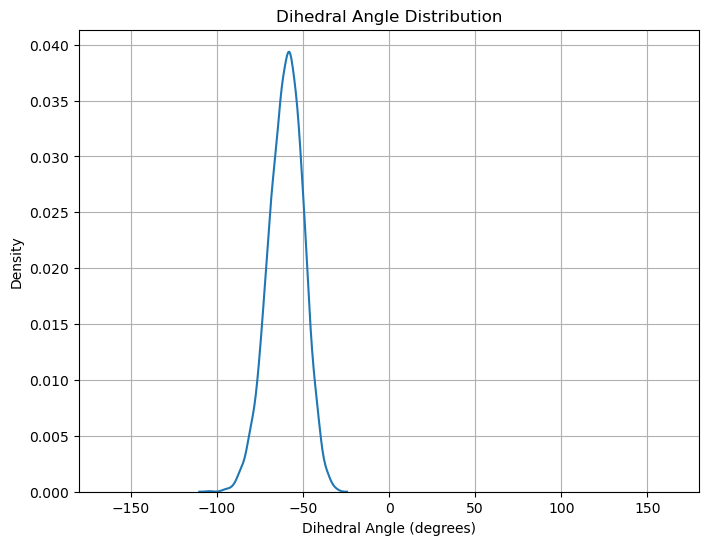

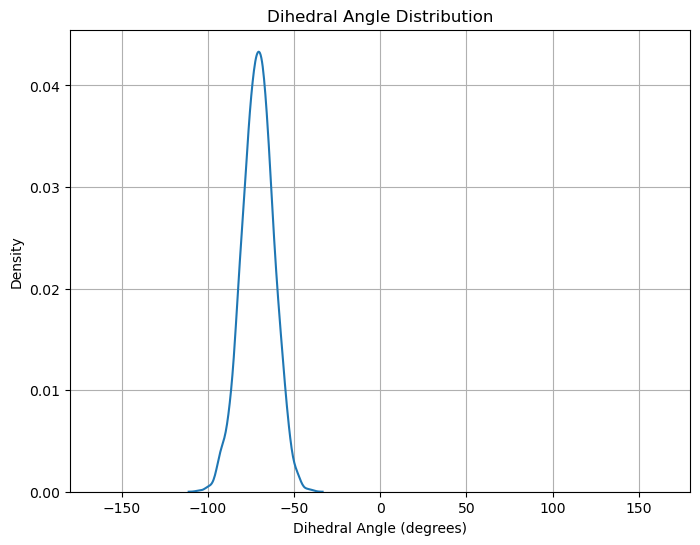

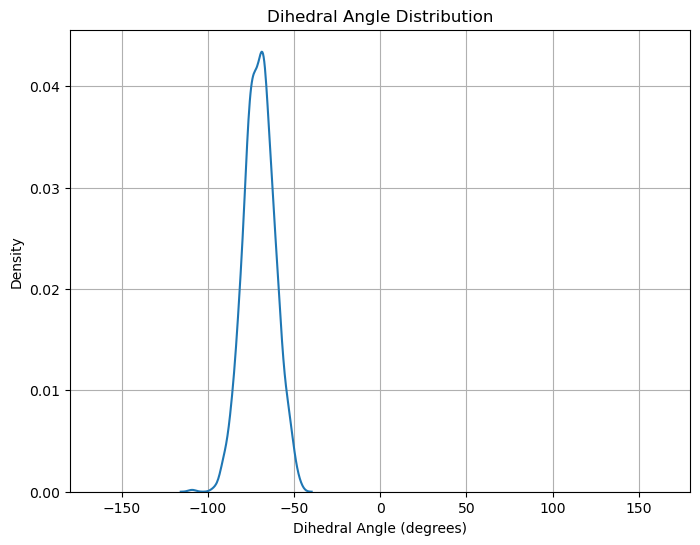

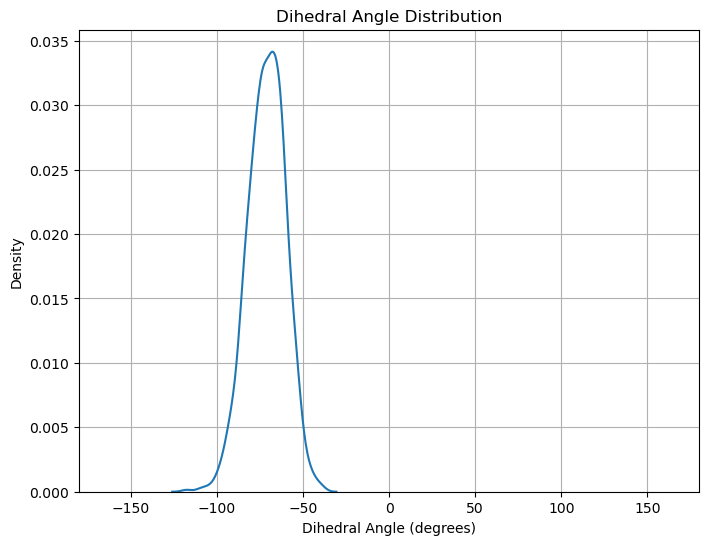

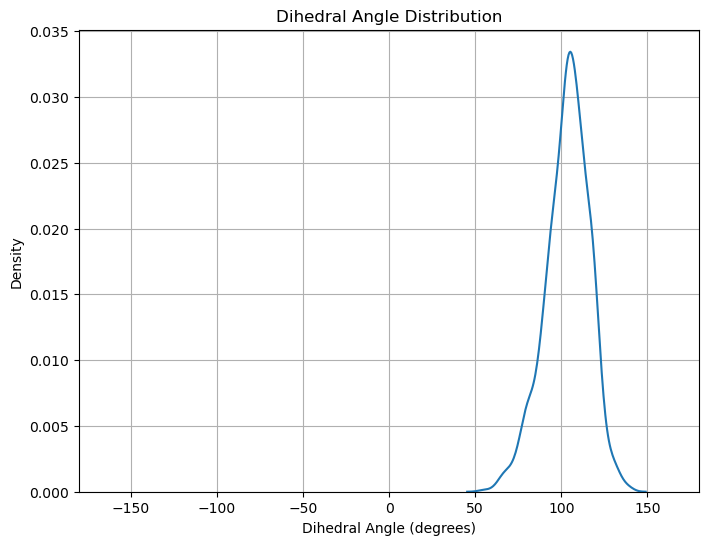

np.float32(103.44519)

In [13]:
plot_dihedral_angles(trj_gaff, [11, 10, 9, 4])
plot_dihedral_angles(trj_sage, [11, 10, 9, 4])
#plot_dihedral_angles(trj_ani, [11, 10, 9, 4])
plot_dihedral_angles(trj_ani_longtime, [11, 10, 9, 4])
plot_dihedral_angles(trj_mace, [11, 10, 9, 4])
plot_dihedral_angles(trj_sage_remd, [11, 10, 9, 4])
plot_dihedral_angles(trj_sage_rest, [11, 10, 9, 4])
plot_dihedral_angles(trj_sage_antrop_rest, [11, 10, 9, 4])

In [14]:
def plot_distance(traj_cont, atom_indices):
    atom_pairs = np.array([atom_indices])
    distances = md.compute_distances(traj_cont, atom_pairs)
    distance = distances[:, 0]
    plt.figure(figsize=(8, 6))
    sns.kdeplot(distance)
    plt.xlabel('Distance (nm)')
    plt.ylabel('Density')
    plt.title('Distance Distribution')
    plt.xlim(0.3, 0.4)
    plt.grid(True)
    plt.show()
    plt.close()
    return np.mean(distance)

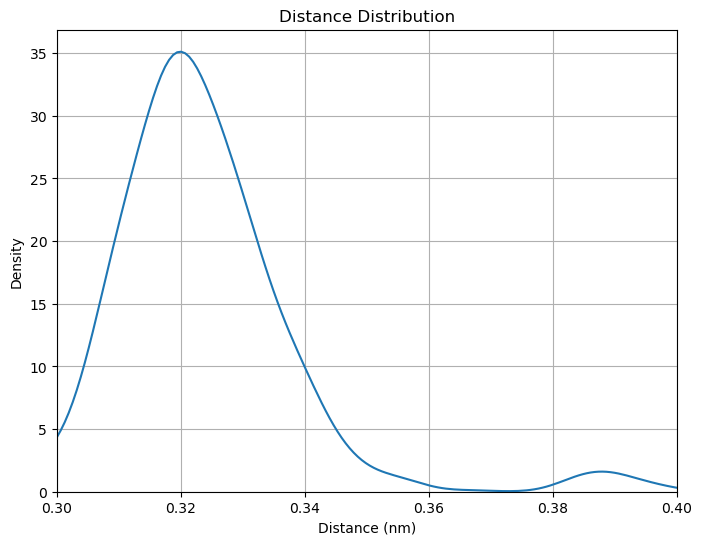

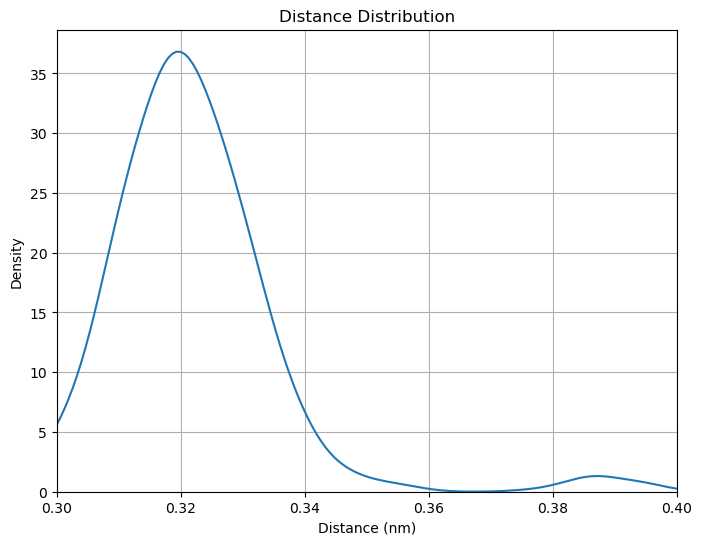

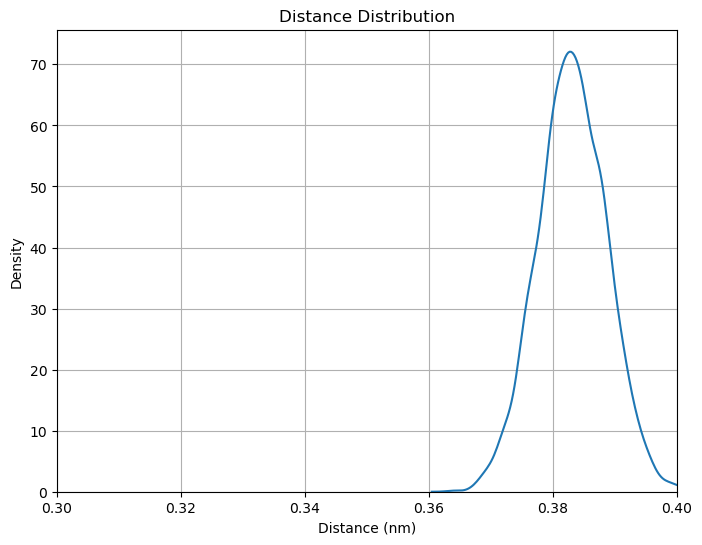

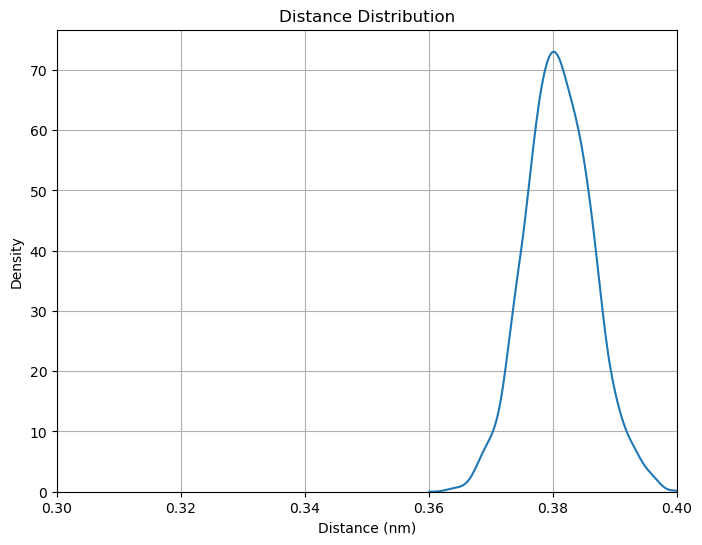

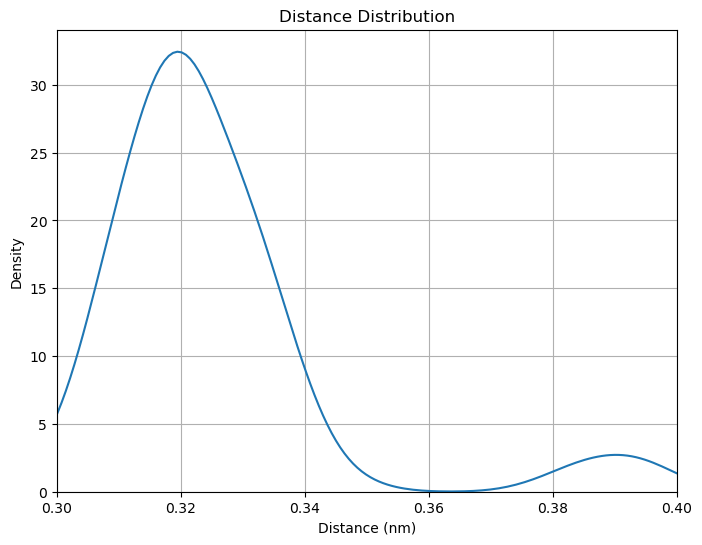

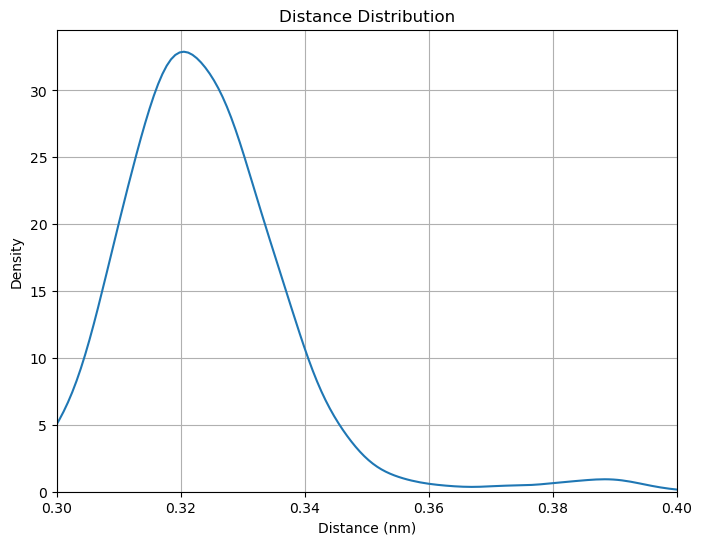

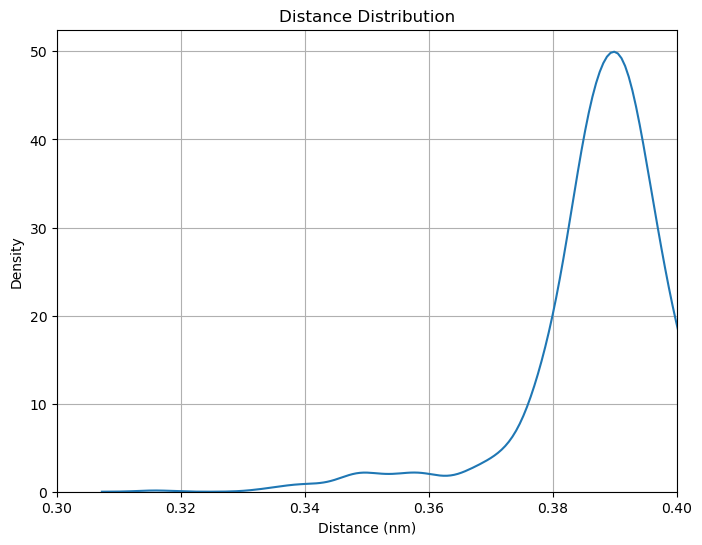

np.float32(0.38748544)

In [15]:
plot_distance(trj_gaff, [55, 58])
plot_distance(trj_sage, [55, 58])
#plot_distance(trj_ani, [55, 58])
plot_distance(trj_ani_longtime, [55, 58])
plot_distance(trj_mace, [55, 58])
plot_distance(trj_sage_remd, [55, 58])
plot_distance(trj_sage_rest, [55, 58])
plot_distance(trj_sage_antrop_rest, [54, 57])

In [16]:
def plot_ligand_pca(traj_files, top_file, slice_step=1):
        traj_cont = md.load(traj_files[0], top=top_file)[::slice_step]
        for i, traj_file in enumerate(traj_files[1:]):
                traj = md.load(traj_file, top=top_file)[::slice_step]
                traj_cont = md.join([traj_cont, traj])
        try:    
                traj_cont.image_molecules(inplace=True)
        except:
                pass
        ligand_atoms = traj_cont.topology.select('resname UNK')
        traj_cont.superpose(traj_cont, frame=0, atom_indices=ligand_atoms)
        ligand_xyz = traj_cont.xyz[:, ligand_atoms, :]
        ligand_xyz_flat = ligand_xyz.reshape(traj_cont.n_frames, len(ligand_atoms) * 3)
        pca1 = PCA(n_components=2)
        reduced_cartesian = pca1.fit_transform(ligand_xyz_flat)
        plt.figure(figsize=(8, 6))
        kde = sns.kdeplot(
                x=reduced_cartesian[:, 0],
                y=reduced_cartesian[:, 1],
                fill=True,
                cmap="viridis",
                thresh=0,
                levels=100
        )
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('KDE of Ligand PCA Coordinates')
        mappable = kde.collections[0]
        plt.colorbar(mappable, label='Density')
        plt.show()
        plt.close()
        return traj_cont

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


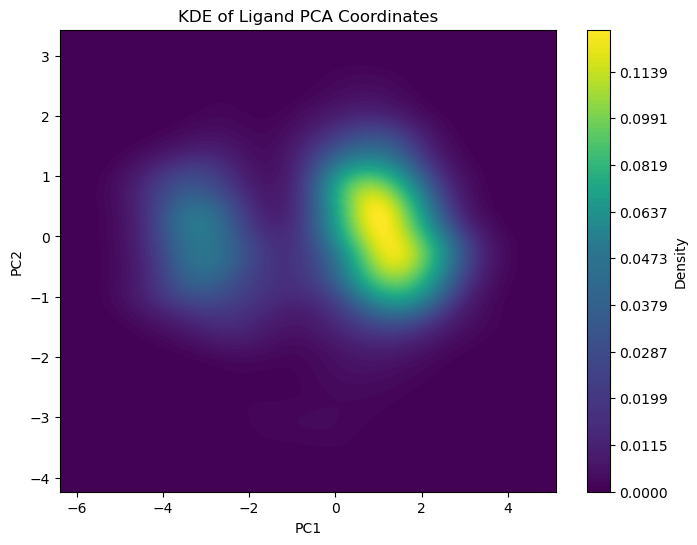

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


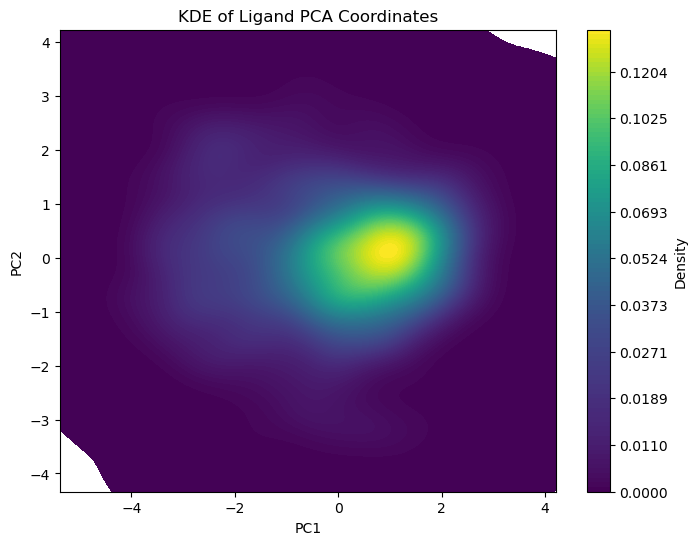

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


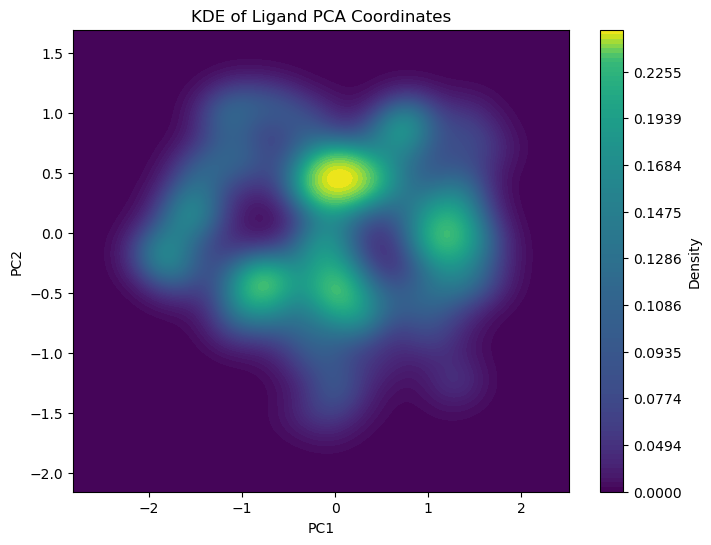

dcdplugin) detected standard 32-bit DCD file of native endianness
dcdplugin) CHARMM format DCD file (also NAMD 2.1 and later)


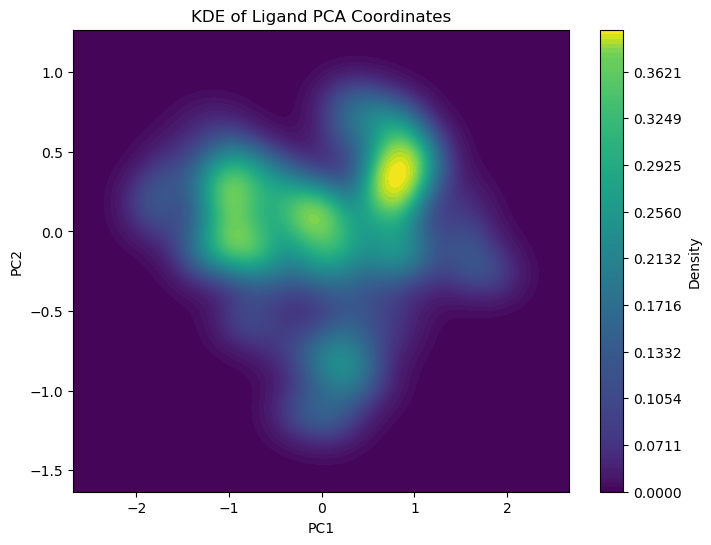

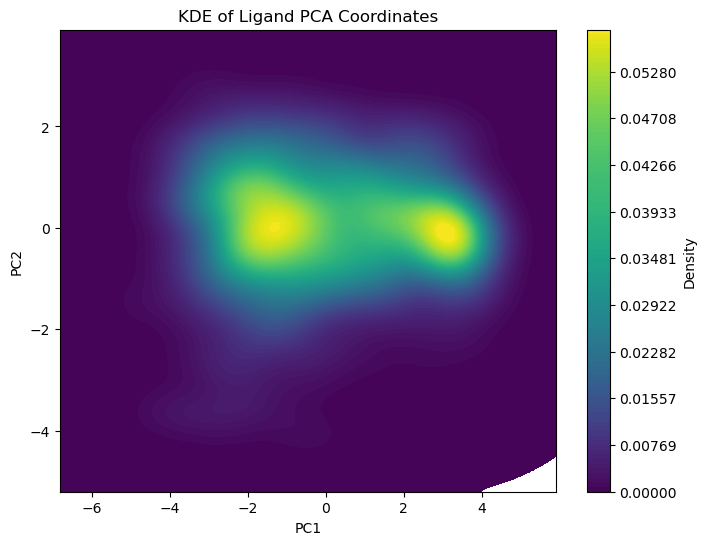

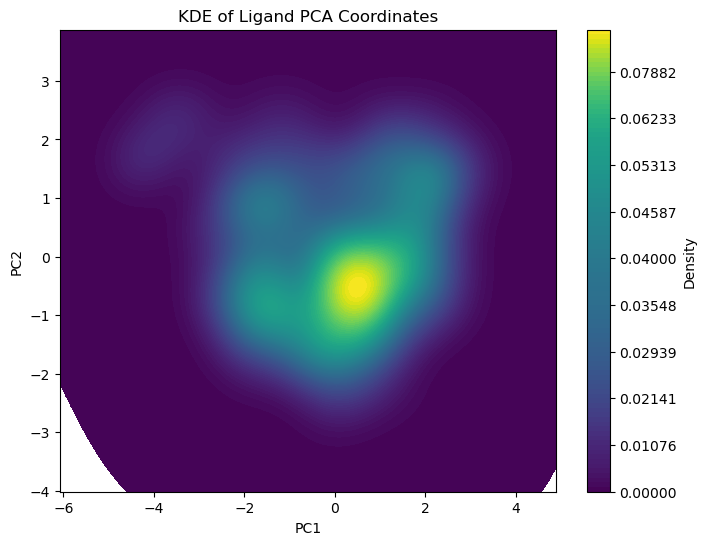

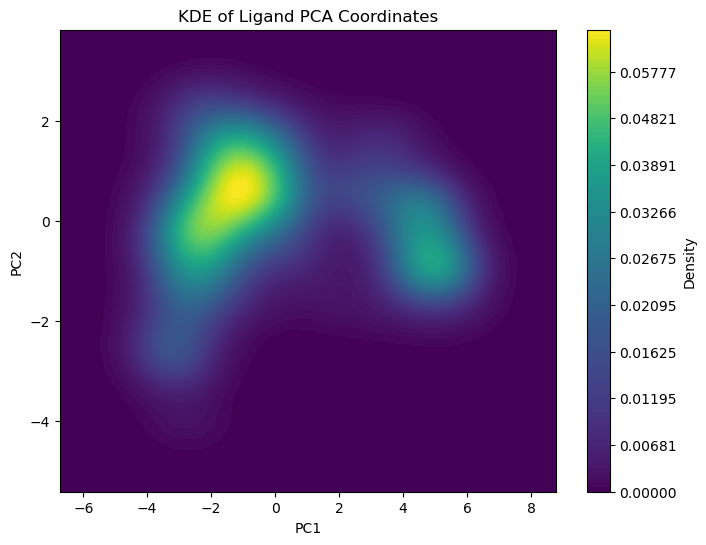

<mdtraj.Trajectory with 1001 frames, 151 atoms, 1 residues, without unitcells at 0x7cad9acf9110>

In [17]:
plot_ligand_pca(['classic/classic_gaff/trajectory.dcd'], 'classic/classic_gaff/gaff_ligand_in_solvent.pdb')
plot_ligand_pca(['classic/classic_sage/trajectory.dcd'], 'classic/classic_sage/ligand_in_solvent.pdb')
#plot_ligand_pca(['classic/classic_ANI2x/test_ani_mixed.dcd'], 'classic/classic_ANI2x/gaff_ligand_in_solvent.pdb')
plot_ligand_pca(['classic/classic_ANI2x_longtime/test_ani_mixed.dcd'], 'classic/classic_ANI2x_longtime/gaff_ligand_in_solvent.pdb')
plot_ligand_pca(['classic/classic_MACEsmall/test_mace_mixed.dcd'], 'classic/classic_MACEsmall/gaff_ligand_in_solvent.pdb')
plot_ligand_pca(['REMD/REMD_2/0_sorted_md_pbc.xtc'], 'REMD/ligand_in_solvent.pdb')
plot_ligand_pca(['REST/REST_2/replica_0_ligand_samples.pdb'], 'REST/ligand.pdb')
plot_ligand_pca(['REST/antropisomer/replica_0_ligand_samples.pdb'], 'REST/ligand_antropisomer.pdb')

In [1]:
import re
import os
import json
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#
def extract_and_split_data(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as file:
                data = json.load(file)
                all_data.append({'filename': filename, 'energy': data["total energy"], 'HOMO_LUMO_gap': data["HOMO-LUMO gap / eV"]})
                df = pd.DataFrame(all_data)
    return df

df = extract_and_split_data('XTB_opt')
df
 

,filename,energy,HOMO_LUMO_gap
0,ANI2x_0001_opt.json,-221.318412,2.520763
1,ANI2x_0002_opt.json,-221.318331,2.539099
2,ANI2x_0003_opt.json,-221.319437,2.525212
3,ANI2x_0004_opt.json,-221.318942,2.535930
4,ANI2x_0005_opt.json,-221.319178,2.525628
...,...,...,...
15001,SAGE_0996_opt.json,-221.321926,2.631728
15002,SAGE_0997_opt.json,-221.325065,2.679623
15003,SAGE_0998_opt.json,-221.323575,2.700723
15004,SAGE_0999_opt.json,-221.323211,2.514509


In [2]:
df['method'] = df['filename'].apply(lambda x: x.split('_')[:-2])
df['method'] = df['method'].apply(lambda x: '_'.join(x))

In [ ]:
df_final = df[df['method'].isin(['GAFF', 'SAGE', 'ANI2x_L', 'MACEsmall', 'REMD', 'REST600d'])]
#
df_final['method'] = df_final['method'].apply(lambda x: 'GAFF 10 ns classic' if x == 'GAFF' else x)
df_final['method'] = df_final['method'].apply(lambda x: 'SAGE 10 ns classic' if x == 'SAGE' else x)
df_final['method'] = df_final['method'].apply(lambda x: 'SAGE 10 ns (16 REMD up to 475K)' if x == 'REMD' else x)
df_final['method'] = df_final['method'].apply(lambda x: 'SAGE 10 ns (16 REST up to 600K)' if x == 'REST600d' else x)
df_final['method'] = df_final['method'].apply(lambda x: 'ANI2x 0.2 ns (ML/MM)' if x == 'ANI2x_L' else x)
df_final['method'] = df_final['method'].apply(lambda x: 'MACEsmall 0.1 ns (ML/MM)' if x == 'MACEsmall' else x)

In [ ]:
df_final.rename(columns={'energy': 'XTB_opt_Energy (ALPB)', 'method': 'sampling method in explicit TIP3P'}, inplace=True)
df_final.sort_values(by='XTB_opt_Energy (ALPB)', inplace=True)
df_final.iloc[:5000].to_csv('top_5000_xtb_energies.csv', index=False)
top_10_per_group = df_final.groupby('sampling method in explicit TIP3P').head(10)
top_10_per_group.to_csv('top_10_xtb_energies_per_group.csv', index=False)

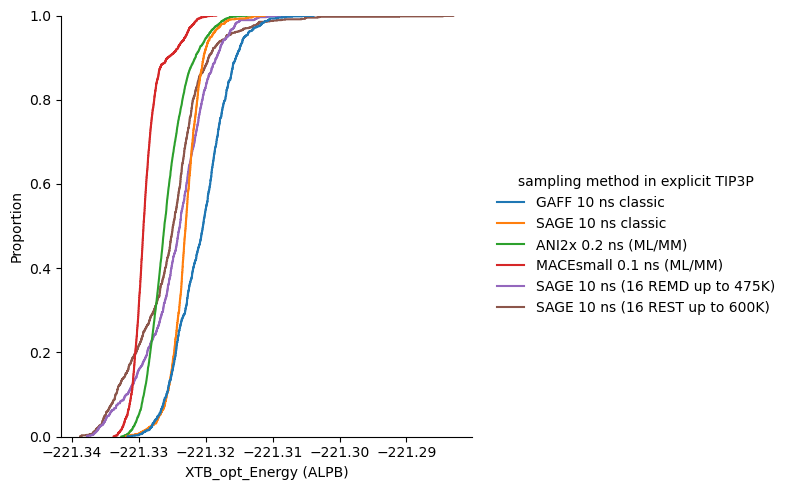

In [5]:
hue_order = ['GAFF 10 ns classic', 'SAGE 10 ns classic','ANI2x 0.2 ns (ML/MM)', 'MACEsmall 0.1 ns (ML/MM)', 'SAGE 10 ns (16 REMD up to 475K)', 'SAGE 10 ns (16 REST up to 600K)']
sns.displot(data=df_final, x='XTB_opt_Energy (ALPB)', kind='ecdf', hue='sampling method in explicit TIP3P', hue_order=hue_order)

In [18]:
for i in top_10_per_group['filename'].to_list():
    filename = i.split('.')[-2] + '.xyz'
    filepath = os.path.join('XTB_opt', filename)
    file_copy_path = os.path.join('dft_spe', filename)
    !cp {filepath} {file_copy_path}    

In [3]:
def prepare_orca_input(xyz_filepath):
    orca_header = [
        '! SP DFT wB97X-D3BJ def2-TZVP RIJCOSX LooseSCF',
        '! D3BJ',
        '! CPCM(water)',
        '%maxcore 4000',
        '%pal',
        '  NProcs 8',
        '  End',
        '* xyz 0 1'
    ]
    orca_trailer = ['*']
    base_name = os.path.splitext(xyz_filepath)[0]
    inp_filepath = base_name + '.inp'

    with open(xyz_filepath, 'r') as f:
        lines = f.readlines()
        
    coordinates = lines[2:]
    modified_content = (
        [line + '\n' for line in orca_header] + 
        coordinates + 
        [line + '\n' for line in orca_trailer]
    )
    
    with open(inp_filepath, 'w') as f:
        f.writelines(modified_content)

    return f"Successfully created ORCA input file: {inp_filepath}"

for filename in os.listdir('XTB_DFT_test/DFT_SPE_NormalSCF'):
    if filename.endswith('.xyz'):
        filepath = os.path.join('XTB_DFT_test/DFT_SPE_NormalSCF', filename)
        prepare_orca_input(filepath)



#for filename in os.listdir('dft_spe'):
    #if filename.endswith('.xyz'):
        #filepath = os.path.join('dft_spe', filename)
        #prepare_orca_input(filepath)

In [15]:
def extract_orca_final_energy(filepath):

    final_pattern = r'&FinalEnergy\s+\[&Type "Double"\]\s*(-?\d+\.\d+(?:[Ee][+\-]?\d+)?)\s*"Final single point energy"'

    cpcm_pattern = r'&CPCMDielEnergy\s+\[&Type "Double"\]\s*(-?\d+\.\d+(?:[Ee][+\-]?\d+)?)'

    with open(filepath, 'r') as f:
        content = f.read()
        match = re.search(cpcm_pattern, content)
        match_1 = re.search(final_pattern, content)
        energy_str = match_1.group(1)
        energy_cpcm_str = match.group(1)
        energy = float(energy_str)
        energy_cpcm = float(energy_cpcm_str)
        energy_exclude_cpcm = energy - energy_cpcm
        return energy, energy_exclude_cpcm

In [ ]:
def_energy_dict = {}
#
for filename in os.listdir('dft_spe'):
    if filename.endswith('.property.txt'):
        filepath = os.path.join('dft_spe', filename)
        basename = os.path.splitext(filename)[0].replace('.property', '.json')
        # Extract DFT Energy (CPCM)
        energy, energy_exclude_cpcm = extract_orca_final_energy(filepath)
        def_energy_dict[basename] = (energy, energy_exclude_cpcm)

#
df_energy = pd.DataFrame.from_dict(def_energy_dict, orient='index', columns=['DFT_spe_Energy (CPCM)', 'DFT_spe_Energy (exclude CPCM)'])
df_energy.reset_index(inplace=True)
df_energy.rename(columns={'index': 'filename'}, inplace=True)
df_energy

,filename,DFT_spe_Energy (CPCM),DFT_spe_Energy (exclude CPCM)
0,ANI2x_0508_opt.json,-3339.963960,-3339.884398
1,ANI2x_0521_opt.json,-3339.964377,-3339.883412
2,ANI2x_0681_opt.json,-3339.957099,-3339.874257
3,ANI2x_0682_opt.json,-3339.956837,-3339.874604
4,ANI2x_0703_opt.json,-3339.958211,-3339.877615
...,...,...,...
65,SAGE_0963_opt.json,-3339.970088,-3339.899024
66,SAGE_0964_opt.json,-3339.969662,-3339.896593
67,SAGE_0965_opt.json,-3339.970399,-3339.897912
68,SAGE_0966_opt.json,-3339.970920,-3339.901971


In [ ]:
df_energy_0 =pd.read_csv('top_10_xtb_energies_per_group.csv')
df_merged = pd.merge(df_energy_0, df_energy, on='filename', how='inner')

<Axes: xlabel='XTB_opt_Energy (ALPB)', ylabel='DFT_spe_Energy (CPCM)'>

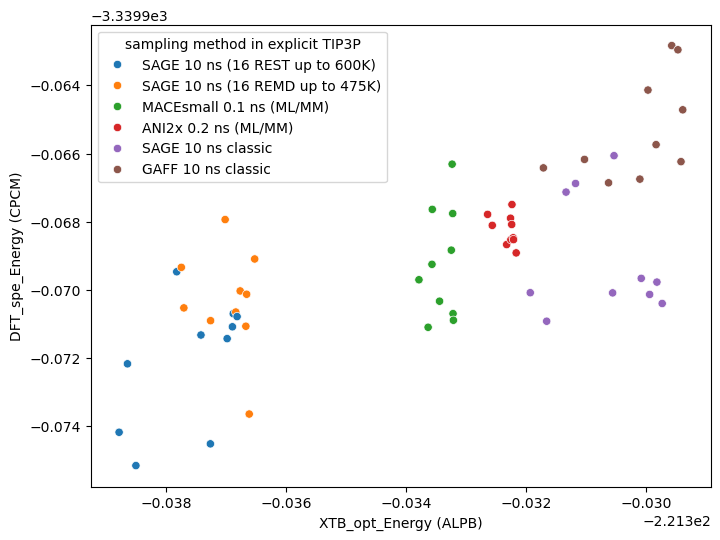

In [19]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
sns.scatterplot(data=df_merged, x='XTB_opt_Energy (ALPB)', y='DFT_spe_Energy (CPCM)', hue='sampling method in explicit TIP3P')

In [20]:
df_merged.to_csv('xtb_dft_energy_comparison.csv', index=False)

In [21]:
df_merged = pd.read_csv('xtb_dft_energy_comparison.csv')
df_merged.head(10)

,filename,XTB_opt_Energy (ALPB),HOMO_LUMO_gap,sampling method in explicit TIP3P,DFT_spe_Energy (CPCM),DFT_spe_Energy (exclude CPCM)
0,REST600d_0162_opt.json,-221.338790,2.583419,SAGE 10 ns (16 REST up to 600K),-3339.974178,-3339.906376
1,REST600d_0157_opt.json,-221.338650,2.625940,SAGE 10 ns (16 REST up to 600K),-3339.972170,-3339.904492
2,REST600d_0166_opt.json,-221.338509,2.631995,SAGE 10 ns (16 REST up to 600K),-3339.975156,-3339.905276
3,REST600d_0844_opt.json,-221.337828,2.563681,SAGE 10 ns (16 REST up to 600K),-3339.969468,-3339.899674
4,REMD_0960_opt.json,-221.337751,2.579695,SAGE 10 ns (16 REMD up to 475K),-3339.969339,-3339.899326
5,REMD_0063_opt.json,-221.337709,2.600165,SAGE 10 ns (16 REMD up to 475K),-3339.970529,-3339.902146
6,REST600d_0179_opt.json,-221.337424,2.511879,SAGE 10 ns (16 REST up to 600K),-3339.971324,-3339.902385
7,REST600d_0167_opt.json,-221.337267,2.636488,SAGE 10 ns (16 REST up to 600K),-3339.974518,-3339.906276
8,REMD_0069_opt.json,-221.337264,2.583855,SAGE 10 ns (16 REMD up to 475K),-3339.970904,-3339.902427
9,REMD_0943_opt.json,-221.337021,2.537188,SAGE 10 ns (16 REMD up to 475K),-3339.967936,-3339.896593


In [22]:
final_list = df_merged['filename'].apply(lambda x: x.split('.')[-2] + '.xyz').to_list()
!mkdir -p final_xyz
for i in final_list:
    filename = i
    filepath = os.path.join('XTB_opt', filename)
    file_copy_path = os.path.join('final_xyz', filename)
    !cp {filepath} {file_copy_path}

In [ ]:
for i in final_list:
    !python MMFF_models/eval_configs.py --configs final_xyz/{i} --model MMFF_models/MACE-OFF24_medium.model --output final_xyz/{i.split('.')[0]}_mace24medium.xyz --device cuda
    !python MMFF_models/eval_configs.py --configs final_xyz/{i} --model MMFF_models/MACE-OFF23_large.model --output final_xyz/{i.split('.')[0]}_mace23large.xyz --device cuda

In [24]:
def extract_mace_final_energy(filepath):

    regex_pattern = r'MACE_energy=(-?\d+\.\d+(?:[Ee][+\-]?\d+)?)'

    with open(filepath, 'r') as f:
        content = f.read()
        match = re.search(regex_pattern, content)
        energy_str = match.group(1)
        energy = float(energy_str)
        return energy

extract_mace_final_energy('final_xyz/REST600d_0166_opt_mace24medium.xyz')

-90873.62339438233

In [ ]:
mace_medium_energy_dict = {}
#
for filename in os.listdir('final_xyz'):
    if filename.endswith('_opt.xyz'):
        basename = '_'.join(os.path.splitext(filename)[0].split('_')[:4])
        indexname = basename + '.json'
        #
        mace24medium_name = basename + '_mace24medium.xyz'
        filepath_1 = os.path.join('final_xyz', mace24medium_name)
        mace24medium_energy = extract_mace_final_energy(filepath_1)
        #
        mace23large_name = basename + '_mace23large.xyz'
        filepath_2 = os.path.join('final_xyz', mace23large_name)
        mace23large_energy = extract_mace_final_energy(filepath_2)

        mace_medium_energy_dict[indexname] = (mace24medium_energy, mace23large_energy)

df_mace_energy = pd.DataFrame.from_dict(mace_medium_energy_dict, orient='index', columns=['MACE24medium_Energy', 'MACE23large_Energy'])
df_mace_energy.reset_index(inplace=True)
df_mace_energy.rename(columns={'index': 'filename'}, inplace=True)
df_mace_energy



In [ ]:
df_merged = pd.merge(df_merged, df_mace_energy, on='filename', how='inner')

<Axes: xlabel='MACE24medium_Energy', ylabel='DFT_spe_Energy (exclude CPCM)'>

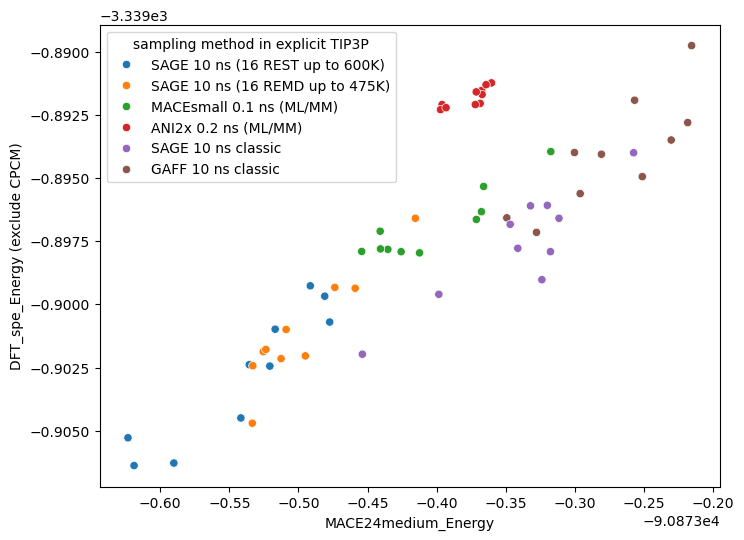

In [30]:
sns.scatterplot(data=df_merged, x='MACE24medium_Energy', y='DFT_spe_Energy (exclude CPCM)', hue='sampling method in explicit TIP3P')

<Axes: xlabel='MACE23large_Energy', ylabel='DFT_spe_Energy (exclude CPCM)'>

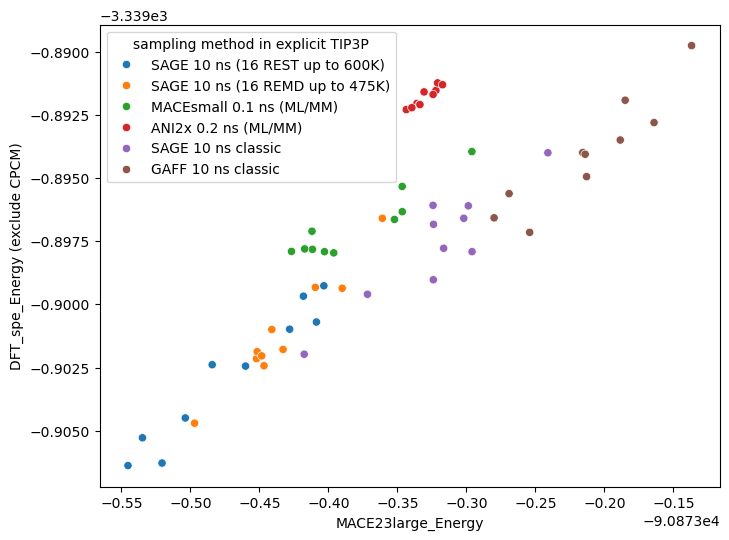

In [31]:
sns.scatterplot(data=df_merged, x='MACE23large_Energy', y='DFT_spe_Energy (exclude CPCM)', hue='sampling method in explicit TIP3P')

In [33]:
df_merged.to_csv('xtb_dft_mace_energy_comparison.csv', index=False)

In [12]:
#uma environment
import os
import numpy as np
import pandas as pd
import seaborn as sns
from ase.io import read
from fairchem.core import FAIRChemCalculator
from fairchem.core.units.mlip_unit import load_predict_unit

In [6]:
esen_predictor = load_predict_unit(
    path="MMFF_models/esen_sm_conserving_all.pt",
    device="cuda",
)
esen_calculator = FAIRChemCalculator(esen_predictor)
#
df = pd.read_csv('xtb_dft_mace_energy_comparison.csv')
final_list = df['filename'].to_list()

omol25_energy_dict = {}
for i in final_list:
    basename = i.split('.')[0] + '.xyz'
    atoms = read(f'final_xyz/{basename}')
    atoms.info = {"charge": 0, "spin": 1}
    atoms.calc = esen_calculator
    energy_eV = atoms.get_potential_energy()
    omol25_energy_dict[i] = energy_eV

In [7]:
import pickle
with open('omol25_energy_dict.pkl', 'wb') as f:
    pickle.dump(omol25_energy_dict, f)

In [ ]:
with open('omol25_energy_dict.pkl', 'rb') as f:
    omol25_energy_dict = pickle.load(f)
omol25_energy_dict = dict(sorted(omol25_energy_dict.items(), key=lambda x: x[1]))

In [ ]:
df_omol25 = pd.DataFrame.from_dict(omol25_energy_dict, orient='index', columns=['OMOL25_Energy'])
df_omol25.reset_index(inplace=True)
df_omol25.rename(columns={'index': 'filename'}, inplace=True)
df_final = pd.merge(df, df_omol25, on='filename', how='inner')

<Axes: xlabel='OMOL25_Energy', ylabel='DFT_spe_Energy (exclude CPCM)'>

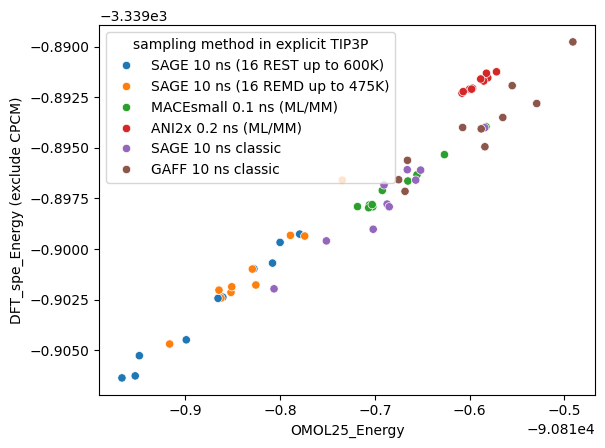

In [13]:
sns.scatterplot(data=df_final, x='OMOL25_Energy', y='DFT_spe_Energy (exclude CPCM)', hue='sampling method in explicit TIP3P')

In [16]:
uma_predictor = load_predict_unit(
    path="MMFF_models/uma-s-1p1.pt",
    device="cuda",
)
uma_calculator = FAIRChemCalculator(uma_predictor, task_name="omol")
#
uma_energy_dict = {}
for i in final_list:
    basename = i.split('.')[0] + '.xyz'
    atoms = read(f'final_xyz/{basename}')
    atoms.info = {"charge": 0, "spin": 1}
    atoms.calc = uma_calculator
    energy_eV = atoms.get_potential_energy()
    uma_energy_dict[i] = energy_eV
#
with open('uma_energy_dict.pkl', 'wb') as f:
    pickle.dump(uma_energy_dict, f)

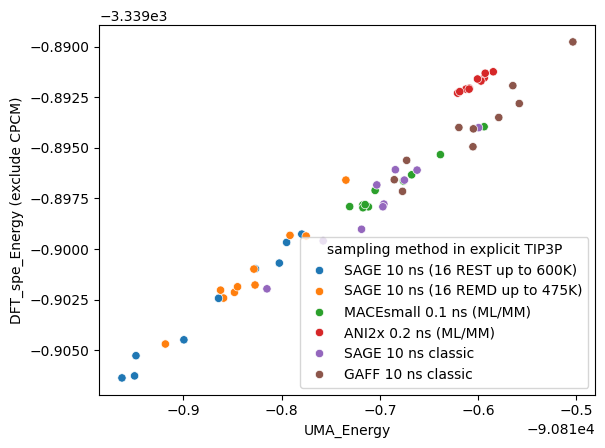

In [17]:
with open('uma_energy_dict.pkl', 'rb') as f:
    uma_energy_dict = pickle.load(f)
uma_energy_dict = dict(sorted(uma_energy_dict.items(), key=lambda x: x[1]))

df_uma = pd.DataFrame.from_dict(uma_energy_dict, orient='index', columns=['UMA_Energy'])
df_uma.reset_index(inplace=True)
df_uma.rename(columns={'index': 'filename'}, inplace=True)
df_final = pd.merge(df_final, df_uma, on='filename', how='inner')
sns.scatterplot(data=df_final, x='UMA_Energy', y='DFT_spe_Energy (exclude CPCM)', hue='sampling method in explicit TIP3P')
df_final.to_csv('all_energy_comparison.csv', index=False)

In [43]:
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import rdDetermineBonds
from rdkit.Chem import Draw
from rdkit.Chem import rdMolAlign

In [44]:
mol_list = []
for filename in os.listdir('final_xyz'):
    if filename.endswith('_opt.xyz'):
        basename = filename.split('.')[0] + '.json'
        filepath = os.path.join('final_xyz', filename)
        mol = Chem.MolFromXYZFile(filepath)
        rdDetermineBonds.DetermineBonds(mol, charge=0)
        mol = Chem.RemoveHs(mol)
        mol.SetProp('_Name', basename)
        mol_list.append(mol)

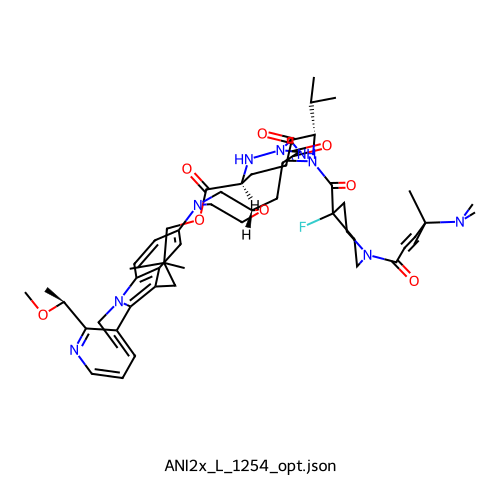

In [45]:
Draw.MolToImage(mol_list[0], size=(500, 500), legend=mol_list[0].GetProp('_Name'))

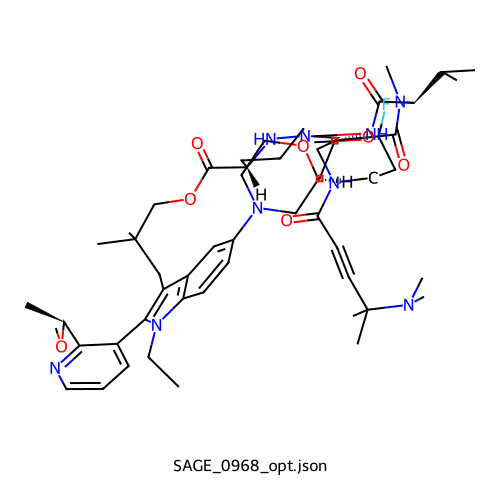

In [46]:
Draw.MolToImage(mol_list[-1], size=(500, 500), legend=mol_list[-1].GetProp('_Name'))

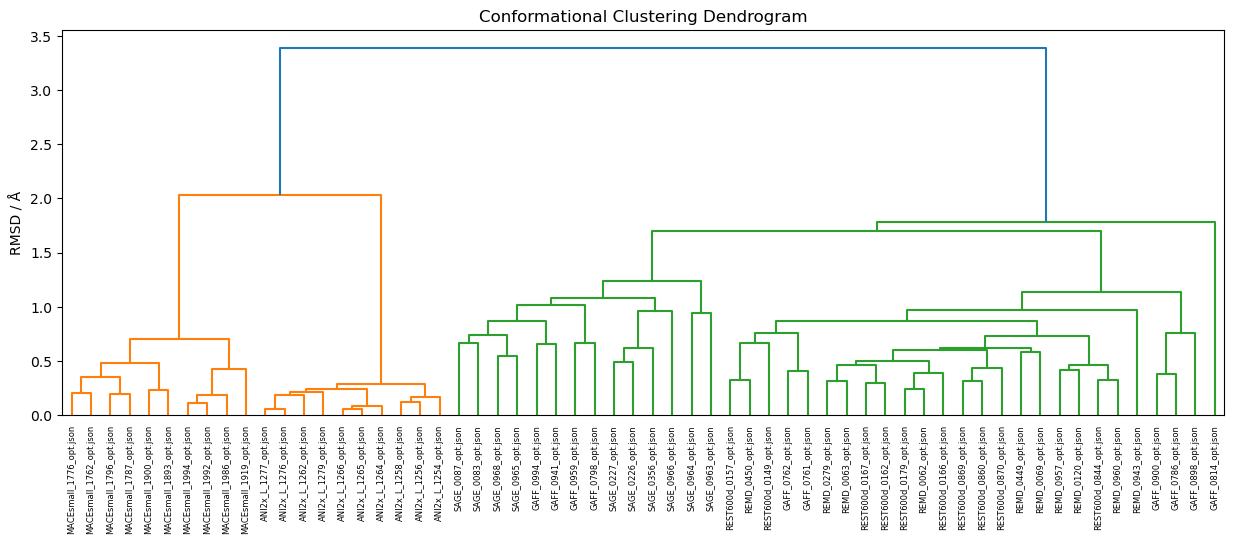

In [47]:
#Perform Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform
from collections import Counter

n_mols = len(mol_list)
rmsd_matrix = np.zeros((n_mols, n_mols))
for i in range(n_mols):
    for j in range(i, n_mols):
        rmsd = rdMolAlign.GetBestRMS(mol_list[i], mol_list[j])
        rmsd_matrix[i, j] = rmsd
        rmsd_matrix[j, i] = rmsd
np.fill_diagonal(rmsd_matrix, 0.0)

condensed_rmsd = squareform(rmsd_matrix)
linkage_matrix = linkage(condensed_rmsd, method='average')

plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix,
           labels=[i.GetProp('_Name') for i in mol_list],
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Conformational Clustering Dendrogram')
plt.ylabel('RMSD / Å')
plt.show()

# Form clusters based on a distance cutoff and reassign clusters based on size
cutoff = 2.0
cluster_labels = fcluster(linkage_matrix, cutoff, criterion='distance')
cluster_sizes = Counter(cluster_labels)
sorted_clusters = sorted(cluster_sizes.items(), key=lambda item: item[1], reverse=True)
mapping = {old_label: new_label for new_label, (old_label, size) in enumerate(sorted_clusters, 1)}
reassigned_labels = np.array([mapping[label] for label in cluster_labels])
for mol, cluster in zip(mol_list, reassigned_labels):
    mol.SetProp('conf. cluster', str(cluster))

In [48]:
mol_bioactive = Chem.SDMolSupplier('bioactive_min.sdf', removeHs=False)[0]
#
for mol in mol_list:
    rmsd = rdMolAlign.GetBestRMS(mol, mol_bioactive)
    mol.SetProp('RMSD_to_bioactive', str(rmsd))

In [49]:
df = pd.read_csv('all_energy_comparison.csv')
for mol in mol_list:
    name = mol.GetProp('_Name')
    cluster = mol.GetProp('conf. cluster')
    rmsd_to_bioactive = mol.GetProp('RMSD_to_bioactive')
    df.loc[df['filename'] == name, 'RMSD_to_bioactive'] = float(rmsd_to_bioactive)
    df.loc[df['filename'] == name, 'conf. cluster'] = 'cluster_' + str(cluster)
#
df.sort_values(by=['conf. cluster', 'DFT_spe_Energy (CPCM)'], inplace=True)
df.to_csv('all_energy_comparison_with_clusters.csv', index=False)

<Axes: xlabel='RMSD_to_bioactive', ylabel='DFT_spe_Energy (CPCM)'>

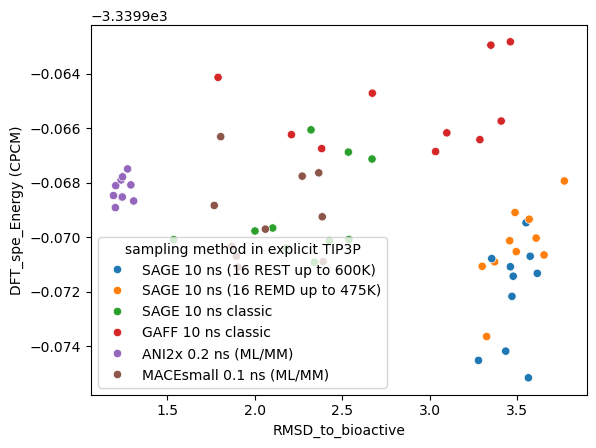

In [50]:
sns.scatterplot(data=df, x='RMSD_to_bioactive', y='DFT_spe_Energy (CPCM)', hue='sampling method in explicit TIP3P')

<Axes: xlabel='RMSD_to_bioactive', ylabel='DFT_spe_Energy (CPCM)'>

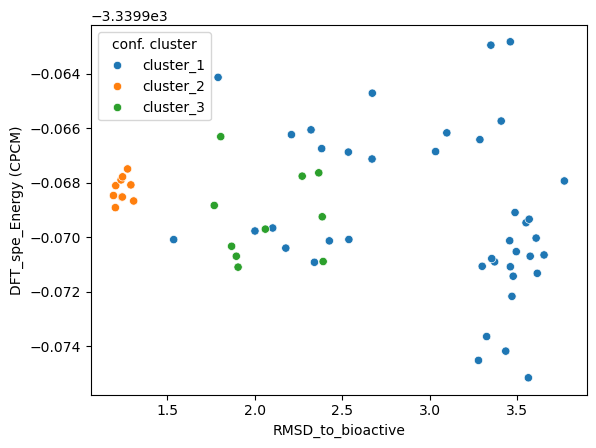

In [52]:
sns.scatterplot(data=df, x='RMSD_to_bioactive', y='DFT_spe_Energy (CPCM)', hue='conf. cluster')

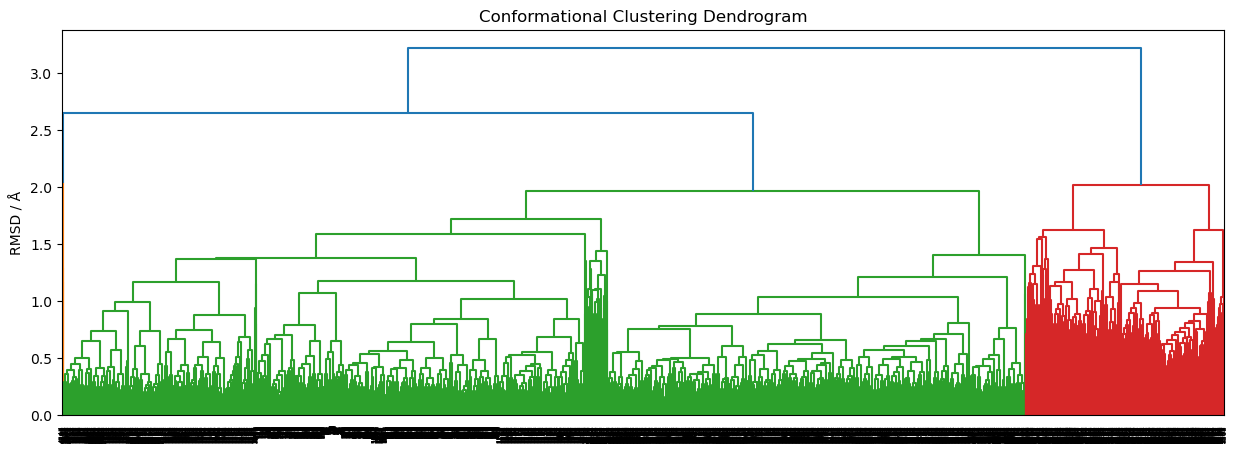

In [ ]:
df = pd.read_csv('top_5000_xtb_energies.csv')
#
mol_list = []
for filename in os.listdir('XTB_opt'):
    if filename in df['filename'].to_list():
        xyzname = filename.split('.')[0] + '.xyz'
        filepath = os.path.join('XTB_opt', xyzname)
        mol = Chem.MolFromXYZFile(filepath)
        rdDetermineBonds.DetermineBonds(mol, charge=0)
        mol = Chem.RemoveHs(mol)
        mol.SetProp('_Name', filename)
        mol_list.append(mol)

n_mols = len(mol_list)
rmsd_matrix = np.zeros((n_mols, n_mols))
for i in range(n_mols):
    for j in range(i, n_mols):
        rmsd = rdMolAlign.GetBestRMS(mol_list[i], mol_list[j])
        rmsd_matrix[i, j] = rmsd
        rmsd_matrix[j, i] = rmsd
np.fill_diagonal(rmsd_matrix, 0.0)

condensed_rmsd = squareform(rmsd_matrix)
linkage_matrix = linkage(condensed_rmsd, method='average')

plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix,
           #labels=[i.GetProp('_Name') for i in mol_list],
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Conformational Clustering Dendrogram')
plt.ylabel('RMSD / Å')
plt.show()

# Form clusters based on a distance cutoff and reassign clusters based on size
cutoff = 2.0
cluster_labels = fcluster(linkage_matrix, cutoff, criterion='distance')
cluster_sizes = Counter(cluster_labels)
sorted_clusters = sorted(cluster_sizes.items(), key=lambda item: item[1], reverse=True)
mapping = {old_label: new_label for new_label, (old_label, size) in enumerate(sorted_clusters, 1)}
reassigned_labels = np.array([mapping[label] for label in cluster_labels])
for mol, cluster in zip(mol_list, reassigned_labels):
    mol.SetProp('cluster', str(cluster))